<a href="https://colab.research.google.com/github/rtajeong/M3_new/blob/main/lab42_pca_tSNE_rev4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dimensionality Reduction
- Feature Elimination: You reduce the feature space by eliminating features. This has a disadvantage though, as you gain no information from those features that you have dropped.
- Feature Selection: You apply some statistical tests in order to rank them according to their importance and then select a subset of features for your work. This again suffers from information loss and is less stable as different test gives different importance score to features.
- Feature Extraction: You create new independent features, where each new independent feature is a combination of each of the old independent features. These techniques can further be divided into linear and non-linear dimensionality reduction techniques.
- tSNE and PCA are feature extraction
- https://www.datacamp.com/community/tutorials/introduction-t-sne?utm_source=adwords_ppc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=278443377086&utm_targetid=aud-299261629574:dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=1009871&gclid=CjwKCAjwtNf6BRAwEiwAkt6UQn9Fh31RQWu68b19VdBqQhZWcl_EiKf-R1fW_5heDab7jEZLOYWqOxoCvHoQAvD_BwE

# Feature selection and Feature extraction
- breastcancer example
- use some important data only (about 30%), SelectPercentile
- tSNE

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
cancer = load_breast_cancer()
X_all = cancer.data
y = cancer.target
X_all = StandardScaler().fit_transform(X_all)

In [ ]:
X_all.shape

(569, 30)

In [ ]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
X_all.dtype

dtype('float64')

## when using all 30 features

In [ ]:
rfc = RandomForestClassifier(n_estimators=200)

In [ ]:
## 교차검증
cross_val_score(rfc, X_all, y, cv=5).mean().round(4)

0.9649

# Feature Selection: importance of feature selection:
- It enables the machine learning algorithm to train faster.
- It reduces the complexity of a model and makes it easier to interpret.
- It improves the accuracy of a model if the right subset is chosen.
- It reduces Overfitting.

### Chi-squared statistics:
- 통계학적으로 상관관계를 계산하여 우연히 어떤 관계가 발생한 것인지 아니면 충분히 연관성이 있는지 알려주는 방법. (즉, dependency 여부를 판단)
- compare the frequencies (두 변수의 빈도 분포가 같으면 independent 로 간주)

## 6개의 특성만 사용하는 경우

### SelectPercentile():
- SelectPercentile(score_func, percentile): Select features according to a percentile
of the highest scores.
- score_func : callable Function taking two arrays X and y, and returning a pair of arrays (scores, pvalues) or a single array with scores. Default is f_classif. The default function only works with classification tasks.
- percentile : int, optional, default=10, Percent of features to keep.

- Chi2 test:
  - 두 범주형 변수간의 상관관계를 측정하는 통계적 기법
  - observed value (input feature) 가 expected value (expected output)와 얼마나 관련이 있는지 결정
  - problem of feature selection.
  - X^2 = sum[(Oi - Ei)^2 / Ei], where
    - Oi: observed frq in each category
    - Ei: expected freq
    - k: number of categories
    - sum[(관측값 - 기댓값)^2 / 기댓값]
  - When two features are independent, the observed count is close to the expected count, thus we will have smaller Chi-Square value.
  - So high Chi-Square value indicates that the hypothesis of independence is incorrect.
  - **In simple words, higher the Chi-Square value the feature is more dependent on the response and it can be selected for model training.**

- F-value in ANOVA test
  - a tool to help you answer the question “Is the variance between the means of two populations significantly different?”
  - F value = variance of the group means (Mean Square Between) / mean of the within group variances (Mean Squared Error)

- The P value is the probability of getting a result at least as extreme as the one that was actually observed, given that the null hypothesis is true.
  - T**he lower the p-value, the greater the statistical significance of the observed difference**.

In [ ]:
# fs = SelectPercentile(feature_selection.chi2, percentile = 20) # 영향력이 큰 상위 20% 만
# fs.fit(cancer.data, y)
# fs.get_support()

In [ ]:
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.preprocessing import StandardScaler
fs = SelectPercentile(percentile = 20)
sc = StandardScaler()
X_P = fs.fit_transform(cancer.data, y)
X_P = sc.fit_transform(X_P)

In [ ]:
fs.get_support()   # 20% - 6개

array([False, False,  True, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True,  True, False, False, False,
        True, False, False])

In [ ]:
fs.scores_, fs.scores_.argsort()[::-1]   # feature score

(array([6.46981021e+02, 1.18096059e+02, 6.97235272e+02, 5.73060747e+02,
        8.36511234e+01, 3.13233079e+02, 5.33793126e+02, 8.61676020e+02,
        6.95274435e+01, 9.34592949e-02, 2.68840327e+02, 3.90947023e-02,
        2.53897392e+02, 2.43651586e+02, 2.55796780e+00, 5.32473391e+01,
        3.90144816e+01, 1.13262760e+02, 2.41174067e-02, 3.46827476e+00,
        8.60781707e+02, 1.49596905e+02, 8.97944219e+02, 6.61600206e+02,
        1.22472880e+02, 3.04341063e+02, 4.36691939e+02, 9.64385393e+02,
        1.18860232e+02, 6.64439606e+01]),
 array([27, 22,  7, 20,  2, 23,  0,  3,  6, 26,  5, 25, 10, 12, 13, 21, 24,
        28,  1, 17,  4,  8, 29, 15, 16, 19, 14,  9, 11, 18]))

In [ ]:
fs.pvalues_, fs.pvalues_.argsort()   # p_values of feature scores

(array([8.46594057e-096, 4.05863605e-025, 8.43625104e-101, 4.73456431e-088,
        1.05185036e-018, 3.93826311e-056, 9.96655576e-084, 7.10115016e-116,
        5.73338403e-016, 7.59936804e-001, 9.73894866e-050, 8.43332029e-001,
        1.65190518e-047, 5.89552139e-046, 1.10296609e-001, 9.97599465e-013,
        8.26017617e-010, 3.07230877e-024, 8.76641818e-001, 6.30735508e-002,
        8.48229192e-116, 1.07805749e-030, 5.77139714e-119, 2.82884770e-097,
        6.57514363e-026, 7.06981635e-055, 2.46466396e-072, 1.96909971e-124,
        2.95112058e-025, 2.31643245e-015]),
 array([27, 22,  7, 20,  2, 23,  0,  3,  6, 26,  5, 25, 10, 12, 13, 21, 24,
        28,  1, 17,  4,  8, 29, 15, 16, 19, 14,  9, 11, 18]))

In [ ]:
cancer.feature_names[[23,3]]

array(['worst area', 'mean area'], dtype='<U23')

In [ ]:
cancer.feature_names[fs.get_support()]

array(['mean perimeter', 'mean concave points', 'worst radius',
       'worst perimeter', 'worst area', 'worst concave points'],
      dtype='<U23')

In [ ]:
cross_val_score(rfc, X_P, y).mean().round(4)

0.942

## 2개의 특성만 사용하는 경우

In [ ]:
# 상위 6%의 유효한 특성만 선택
fs = SelectPercentile(percentile = 6)
X_P = fs.fit_transform(cancer.data, y)
X_P = sc.fit_transform(X_P)
cancer.feature_names[fs.get_support()]

array(['worst perimeter', 'worst concave points'], dtype='<U23')

In [ ]:
cancer.data.shape, X_P.shape

((569, 30), (569, 2))

In [ ]:
cross_val_score(rfc, X_P, y).mean()

0.9297003570874087

In [ ]:
fs.pvalues_.argsort()

array([27, 22,  7, 20,  2, 23,  0,  3,  6, 26,  5, 25, 10, 12, 13, 21, 24,
       28,  1, 17,  4,  8, 29, 15, 16, 19, 14,  9, 11, 18])

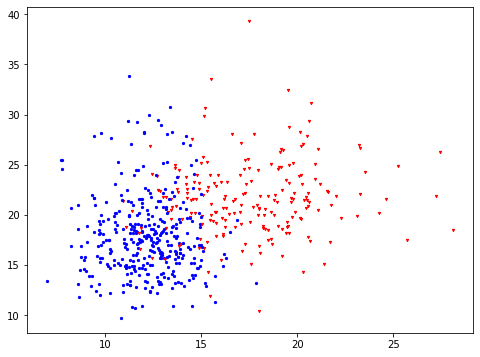

In [ ]:
m = ['v', 'o']
c = ['r','b']
plt.figure(figsize=(8,6))
for i in range(len(y)):
    plt.scatter(cancer.data[:,0][i],cancer.data[:,1][i], marker=m[y[i]], c=c[y[i]], s=5)
plt.show()

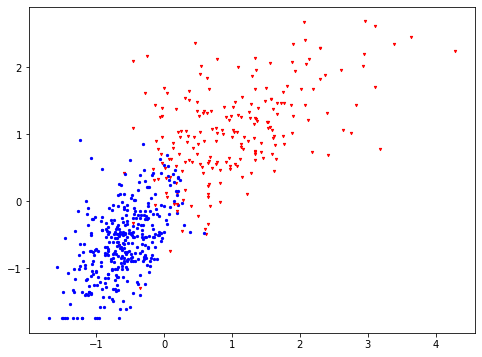

In [ ]:
m = ['v', 'o']
c = ['r','b']
plt.figure(figsize=(8,6))
for i in range(len(y)):
    plt.scatter(X_P[:,0][i],X_P[:,1][i], marker=m[y[i]], c=c[y[i]], s=5)
plt.show()

# PCA (Principal Component Analysis)

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_all)

In [ ]:
pca_result # after dimensionality reduction, there usually isn’t a particular
           # meaning assigned to each principal component. The new components are
           # just the two main dimensions of variation.

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

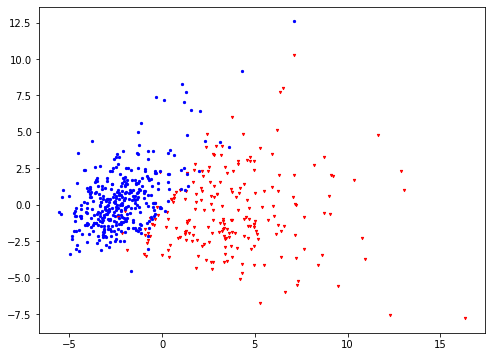

In [ ]:
m = ['v', 'o']
c = ['r','b']
plt.figure(figsize=(8,6))
for i in range(len(y)):
    plt.scatter(pca_result[:,0][i],pca_result[:,1][i], marker=m[y[i]], c=c[y[i]], s=5)
plt.show()

In [ ]:
pca.components_.round(3) # 기존의 30개의 특성에 각각 어떤 가중치를 곱했는지 파악

array([[ 0.219,  0.104,  0.228,  0.221,  0.143,  0.239,  0.258,  0.261,
         0.138,  0.064,  0.206,  0.017,  0.211,  0.203,  0.015,  0.17 ,
         0.154,  0.183,  0.042,  0.103,  0.228,  0.104,  0.237,  0.225,
         0.128,  0.21 ,  0.229,  0.251,  0.123,  0.132],
       [-0.234, -0.06 , -0.215, -0.231,  0.186,  0.152,  0.06 , -0.035,
         0.19 ,  0.367, -0.106,  0.09 , -0.089, -0.152,  0.204,  0.233,
         0.197,  0.13 ,  0.184,  0.28 , -0.22 , -0.045, -0.2  , -0.219,
         0.172,  0.144,  0.098, -0.008,  0.142,  0.275]])

In [ ]:
pca.explained_variance_ratio_, sum(pca.explained_variance_ratio_) # 각 주성분 요소들이 얼마나 데이터를
                                                                  # 잘 설명하는지 파악

(array([0.44272026, 0.18971182]), 0.6324320765155952)

## 2개의 주성분만 사용하여 분류를 수행

In [ ]:
cross_val_score(rfc, pca_result, y, cv=5).mean()

0.9349945660611706

## 6개의 주성분만 사용하여 분류를 수행

In [ ]:
pca = PCA(n_components=6)
pca_result = pca.fit_transform(X_all)
cross_val_score(rfc, pca_result, y, cv=5).mean()

0.9542928116752056

### 앞의 selectPercentile 보다 성능이 개선됨

# tSNE():
- 고차원의 데이터를 저차원으로 축소. visualization tool
- 고차원 공간에서 유클리드 거리를 데이터 포인트의 유사성을 표현하는 조건부 확률로 변환하는 방법

## tSNE visualization
- n_components: Dimension of the embedded space
- perplexity: float, optional (default: 30) : The perplexity is related to the number of nearest neighbors that is used in other manifold learning algorithms. Larger datasets usually require a larger perplexity. Consider selecting a value between 5 and 50. Different values can result in significanlty different results.(당혹, 곤혹), 데이터 점 xi의 유효한 근방의 개수의 척도

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=1000)
tsne_results = tsne.fit_transform(cancer.data)    # original data (not scaled)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.000s...
[t-SNE] Computed neighbors for 569 samples in 0.053s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 38.912067
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.732956
[t-SNE] KL divergence after 1000 iterations: 0.216332


In [ ]:
tsne_results.shape

(569, 2)

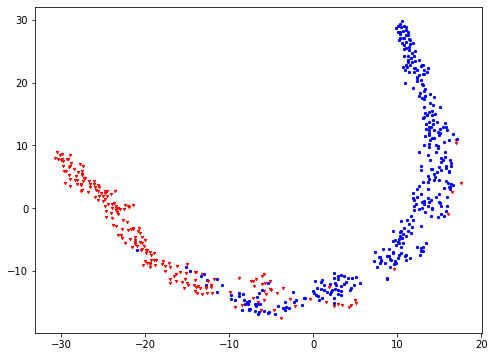

In [ ]:
m = ['v','o']
c = ['r','b']
plt.figure(figsize=(8,6))
for i in range(len(y)):
    plt.scatter(tsne_results[:,0][i],tsne_results[:,1][i], marker=m[y[i]], c=c[y[i]], s=5)
plt.show()

## Scaling and tSNE visulaization

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=1000)
tsne_results = tsne.fit_transform(X_all)  # X_all scaled

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.000s...
[t-SNE] Computed neighbors for 569 samples in 0.023s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 1.522404
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.744720
[t-SNE] KL divergence after 1000 iterations: 0.882040


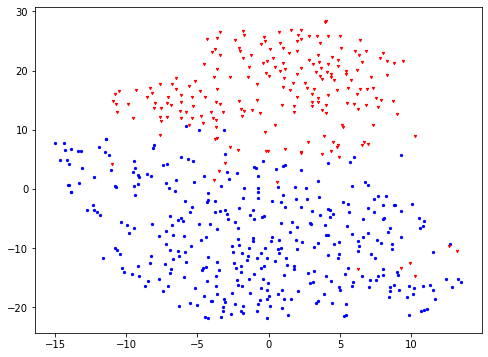

In [ ]:
m = ['v','o']
c = ['r','b']
plt.figure(figsize=(8,6))
for i in range(len(y)):
    plt.scatter(tsne_results[:,0][i],tsne_results[:,1][i], marker=m[y[i]], c=c[y[i]], s=5)
plt.show()

In [ ]:
tsne_results.shape

(569, 2)

In [ ]:
cross_val_score(rfc, tsne_results, y, cv=5).mean().round(4)

0.9684

- even better than PCA.

# MNIST dataset dimension reduction

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train[7].shape   # single channel

(28, 28)

3

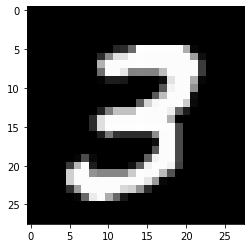

In [ ]:
plt.imshow(x_train[7], cmap='gray')
y_train[7]

In [ ]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(60000, 784) (10000, 784) (60000,) (10000,)


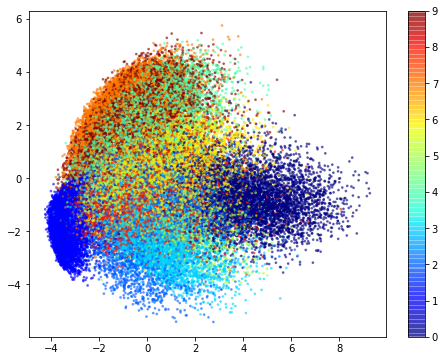

In [ ]:
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(x_train)

plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=y_train, cmap='jet', alpha=0.5, s=3)
plt.colorbar()
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 6000 samples in 0.006s...
[t-SNE] Computed neighbors for 6000 samples in 1.398s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6000
[t-SNE] Computed conditional probabilities for sample 2000 / 6000
[t-SNE] Computed conditional probabilities for sample 3000 / 6000
[t-SNE] Computed conditional probabilities for sample 4000 / 6000
[t-SNE] Computed conditional probabilities for sample 5000 / 6000
[t-SNE] Computed conditional probabilities for sample 6000 / 6000
[t-SNE] Mean sigma: 2.277369
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.252029
[t-SNE] KL divergence after 1000 iterations: 1.479849


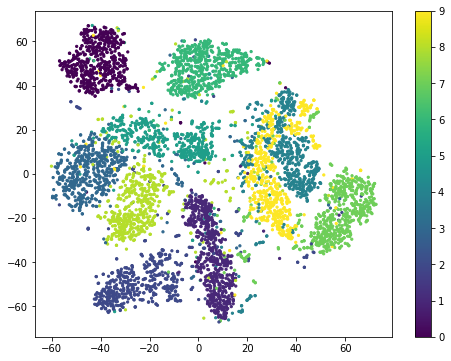

In [ ]:
x_train = x_train[:6000]   # too big to computer tSNE
y_train = y_train[:6000]

tsne = TSNE(n_components = 2, verbose=1, perplexity=40, n_iter=1000)
tsne_result = tsne.fit_transform(x_train)

plt.figure(figsize=(8,6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=y_train, s=5)
plt.colorbar()
plt.show()

- T-SNE is incredibly flexible, and can often find structure where other dimensionality-reduction algorithms cannot.
- But, it is hard to interpret.
- Useful to **develop an intuition** for what’s going on.

- For more of t-SNE, please refer to the following site: https://distill.pub/2016/misread-tsne/
- good YouTube, see https://www.youtube.com/watch?v=NEaUSP4YerM&t=52s

# Exercise

## Principal Components


In [1]:
import numpy as np

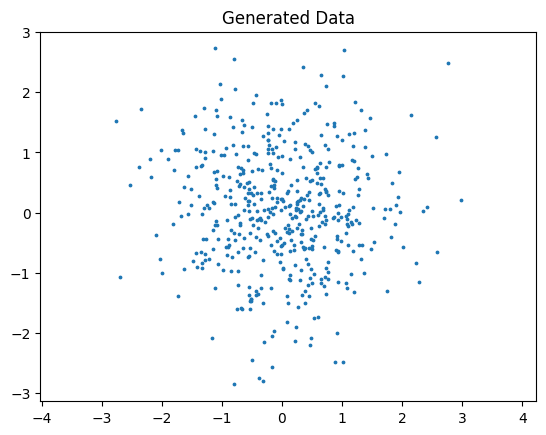

In [118]:
x1 = np.random.normal(0, 1, 500)
x2 = np.random.normal(0, 1, 500)
X = np.vstack((x1, x2)).T
plt.scatter(X[:, 0], X[:, 1], s=3)
plt.title('Generated Data')
plt.axis('equal');


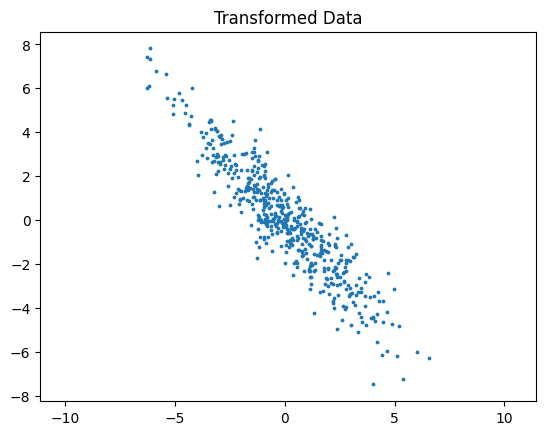

In [119]:
# Center the matrix at the origin
X = X - np.mean(X, 0)

# Scaling matrix
sx, sy = 0.7, 3.4
Scale = np.array([[sx, 0], [0, sy]])

# Rotation matrix
theta = 0.77*np.pi
c, s = np.cos(theta), np.sin(theta)
Rot = np.array([[c, -s], [s, c]])

# Transformation matrix
T = Scale.dot(Rot)

# Apply transformation matrix to X
Y = X.dot(T)

plt.scatter(Y[:, 0], Y[:, 1], s=3)
plt.title('Transformed Data')
plt.axis('equal');

In [120]:
C = Y.T@Y/(Y.shape[0] - 1)    # covariance matrix

In [121]:
eigen_vals, eigen_vecs = np.linalg.eig(C)

In [122]:
eigen_vals

array([ 0.44406022, 11.19895213])

In [123]:
eigen_vecs.round(2)

array([[-0.75,  0.67],
       [-0.67, -0.75]])

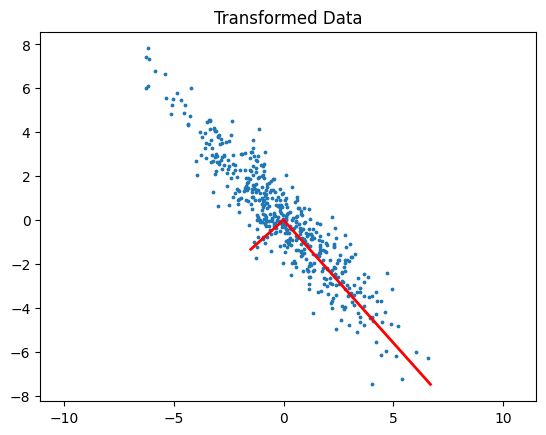

In [124]:
# see https://datascienceplus.com/understanding-the-covariance-matrix/

plt.scatter(Y[:, 0], Y[:, 1], s=3)
for e, v in zip(eigen_vals, eigen_vecs.T):
    plt.plot([0, 3*np.sqrt(e)*v[0]],
             [0, 3*np.sqrt(e)*v[1]],
             'r-', lw=2)
plt.title('Transformed Data')
plt.axis('equal');

## PCS and SVD

In [125]:
# PCA and SVD
X_org = np.array([[-1., 1., 0., 1.],
                  [3., -1., 1., 2.],
                  [1., 1., -1., 2.]])
X = X-X.mean(axis=0)      # centered

n = X.shape[0]
C = np.dot(X.T, X) / (n-1)      # covariance matrix
# PCS (eigen decomposition of C)
eigen_vals, eigen_vecs = np.linalg.eig(C)
# SVD
U, Sigma, Vh = np.linalg.svd(X, full_matrices=True)

In [12]:
eigen_vecs          # principal components

array([[ 0.94998736,  0.31228836],
       [-0.31228836,  0.94998736]])

In [13]:
Vh.T

array([[ 0.94998736,  0.31228836],
       [-0.31228836,  0.94998736]])

In [14]:
eigen_vals, Sigma

(array([0.94044854, 0.88643182]), array([21.66295964, 21.03163048]))

In [15]:
# Relationship between singular values and eigen values:
np.allclose(np.square(Sigma) / (n - 1), eigen_vals[:3])      # True

True

- dimension reduction (2-d)

In [39]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit_transform(X), pca.singular_values_

(array([[-5.90592302, -0.00855898],
        [-3.67078519, -0.07304839],
        [-0.08166678,  0.27079612],
        [ 3.03462829, -0.26651663],
        [ 6.6237467 ,  0.07732788]]),
 array([10.07195361,  0.39465247]))

In [ ]:
X@eigen_vecs[:,:3]

In [ ]:
X@Vh.T[:,:3]

## A simple example



In [107]:
X = np.array([[2, 3],
              [3, 5],
              [5, 8],
              [6, 11],
              [8, 14]])

X2 = X - X.mean(axis=0)
Cov = (X2.T @ X2) / (X2.shape[0] - 1)
eigen_vals, eigen_vecs = np.linalg.eig(Cov)
print(eigen_vecs, eigen_vals)

[[-0.88115725 -0.47282333]
 [ 0.47282333 -0.88115725]] [ 0.03893764 25.36106236]


In [108]:
X2 @ eigen_vecs

array([[ 0.00855898,  5.90592302],
       [ 0.07304839,  3.67078519],
       [-0.27079612,  0.08166678],
       [ 0.26651663, -3.03462829],
       [-0.07732788, -6.6237467 ]])

In [110]:
X2 @ eigen_vecs[:,1],  X2 @ eigen_vecs[:,0] # first and second components

(array([ 5.90592302,  3.67078519,  0.08166678, -3.03462829, -6.6237467 ]),
 array([ 0.00855898,  0.07304839, -0.27079612,  0.26651663, -0.07732788]))

In [111]:
# using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print(X_pca)
pca.components_   # principal component vectors

[[-5.90592302 -0.00855898]
 [-3.67078519 -0.07304839]
 [-0.08166678  0.27079612]
 [ 3.03462829 -0.26651663]
 [ 6.6237467   0.07732788]]


array([[ 0.47282333,  0.88115725],
       [ 0.88115725, -0.47282333]])

[]

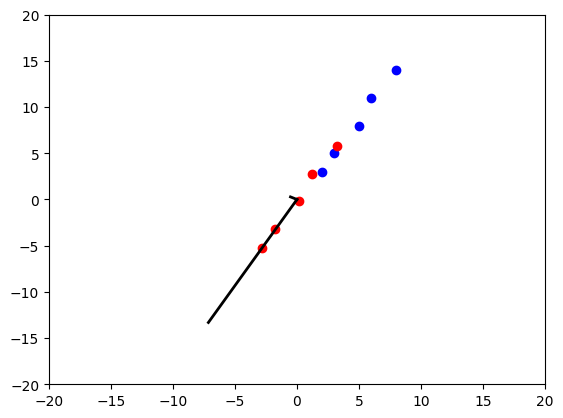

In [117]:
plt.xlim([-20, 20])
plt.ylim([-20, 20])
plt.scatter(X[:,0], X[:,1], c='b')
plt.scatter(X2[:,0], X2[:,1], c='r')

# 주성분 축
for e, v in zip(eigen_vals, eigen_vecs.T):
    plt.plot([0, 3*np.sqrt(e)*v[0]],
             [0, 3*np.sqrt(e)*v[1]],
             'k-', lw=2)
plt.plot()